In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Simple CNN for the MNIST Dataset
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
#1d array, without extracting any features, take whole image and covert it to 1d array and feed it

In [ ]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# X_train training set with 60,000 images
# X_test test set 10,000 images
#y_train training set labels for training images
# y_test test set image lables
y_train[545]

8

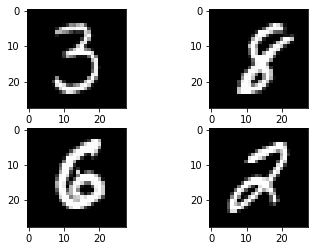

In [ ]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[50], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[545], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[45080], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[35679], cmap=plt.get_cmap('gray'))

28*28

In [ ]:
28*28

784

In [ ]:
# create the object using sequential
# add input layer , add hidden layer, add the output layer
# choose the suitable activation function
# add optimizer and metrices

In [ ]:
DigitClassifier=Sequential()
DigitClassifier.add(Dense(128, input_dim=784, activation='relu'))
# input layer  with 784 inputs
# hidden layer with 128 neurons 1
# output layer with 10 outputs
DigitClassifier.add(Dense(10, activation='softmax'))
	# Compile model
DigitClassifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# since no of classes more than 2 we use categorical crossentropy function for loss measurement
# adam: error minimizer
# accuracy, try to achive better accuracy
DigitClassifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# preprocesing step




In [ ]:
Xm_train = X_train.reshape((X_train.shape[0], 784)).astype('float32')
Xm_test = X_test.reshape((X_test.shape[0], 784)).astype('float32')
# normalize inputs from 0-255 to 0-1
Xm_train = Xm_train / 255
Xm_test = Xm_test / 255

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
Xm_test.shape

(10000, 784)

In [ ]:
500*500
# size of NN increases
# learning time increases
# we are not extracting features and feeding to NN
# CNN introduced

250000

In [ ]:
500*500*3

750000

In [ ]:
ym_train = np_utils.to_categorical(y_train) # converting to categories
ym_test = np_utils.to_categorical(y_test)

In [ ]:
ym_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
DigitClassifier.fit(Xm_train, ym_train, validation_data=(Xm_test, ym_test), epochs=5, batch_size=200)
#iteration 200*300
#Weights modeled

Epoch 1/5
300/300 [==============================] - 2s 5ms/step - loss: 0.4091 - accuracy: 0.8890 - val_loss: 0.2161 - val_accuracy: 0.9379
Epoch 2/5
300/300 [==============================] - 1s 4ms/step - loss: 0.1872 - accuracy: 0.9463 - val_loss: 0.1553 - val_accuracy: 0.9546
Epoch 3/5
300/300 [==============================] - 1s 5ms/step - loss: 0.1371 - accuracy: 0.9608 - val_loss: 0.1288 - val_accuracy: 0.9610
Epoch 4/5
300/300 [==============================] - 1s 5ms/step - loss: 0.1079 - accuracy: 0.9690 - val_loss: 0.1081 - val_accuracy: 0.9669
Epoch 5/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0888 - accuracy: 0.9752 - val_loss: 0.0986 - val_accuracy: 0.9700


In [ ]:
scores = DigitClassifier.evaluate(Xm_test, ym_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9700


In [ ]:
scores

In [ ]:
print('loss =', scores[0], 'accuracy=', scores[1])

loss = 0.09860904514789581 accuracy= 0.9700000286102295


array([[2.2749932e-06, 7.2074261e-05, 3.5066960e-06, 9.8162575e-04,
        4.1119034e-05, 9.9866438e-01, 8.4795800e-05, 4.1849133e-09,
        1.4381383e-04, 6.4641426e-06]], dtype=float32)

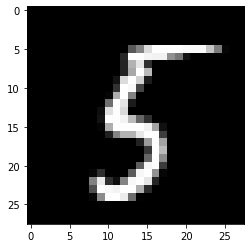

In [ ]:
#plt.subplot(224)
plt.imshow(X_test[2003], cmap=plt.get_cmap('gray'))#

R1=DigitClassifier.predict(Xm_test[2003:2004])
R1

In [ ]:
R3=np.argmax(R1,axis=1) # get the location of maximum probability and location will be desired result
print(R3)

[5]


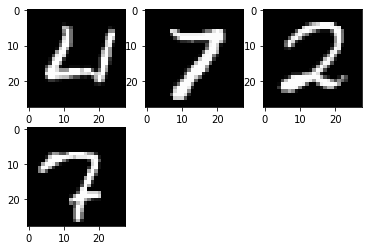

In [ ]:
# plot 4 images as gray scale
plt.subplot(231)
plt.imshow(X_test[33], cmap=plt.get_cmap('gray'))
plt.subplot(232)
plt.imshow(X_test[34], cmap=plt.get_cmap('gray'))
plt.subplot(233)
plt.imshow(X_test[35], cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.imshow(X_test[36], cmap=plt.get_cmap('gray'))
#plt.subplot(235)
#plt.imshow(X_test[4], cmap=plt.get_cmap('gray'))
#plt.subplot(236)
#plt.imshow(X_test[5], cmap=plt.get_cmap('gray'))

In [ ]:
R3=np.argmax(R1,axis=1) # get the location of maximum probability and location will be desired result
print(R3)

[4 7 2 7]


In [ ]:
100*100==50000
10000